# Mathematical morphology

The goal of this homework is to study basics concepts related to mathematical morphology (structuring elements, erosion, dilation, opening, closing, operators by reconstruction). Let us first load the necessary packages for this laboratory. 



In [ ]:
!pip install plotly==5.6.0 matplotlib==3.5.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Upload the "Data.zip" in the session storage (using the "Files" and "Upload" options on the upper left part of the browser). The Archive contains the image material corresponding to this lab. 

Once the upload is done, decompress the archive.

In [ ]:
!unzip Data.zip

Archive:  Data.zip
replace __MACOSX/._Data? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace Data/Mark.bmp? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

## 1 Structuring elements
The morphological equivalent to the notion of impulse response is the structuring element. To precisley study erosion and dilation, the  [scipy.ndimage](https://docs.scipy.org/doc/scipy-0.18.1/reference/ndimage.html) package will be used in this section. It contains various functions for multi-dimensional image processing including basic morphological transforms. Moreover, it precisely controls the padding used for morphological filtering and the structuring element definition.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy   import ndimage
from skimage import io, transform

def display_image(img, title='', size=None):
  #plt.subplot(1,2,1)
  plt.gray()
  h = plt.imshow(img, interpolation='none', vmin=0, vmax=1)
  if size:
    dpi = h.figure.get_dpi()/size
    h.figure.set_figwidth(img.shape[1] / dpi)
    h.figure.set_figheight(img.shape[0] / dpi)
    h.figure.canvas.resize(img.shape[1] + 1, img.shape[0] + 1)
    h.axes.set_position([0, 0, 1, 1])
    h.axes.set_xlim(-1, img.shape[1])
    h.axes.set_ylim(img.shape[0], -1)
  plt.grid(False)
  plt.title(title)  
  plt.show()

In this session, three flat structuring elements are used: "Flat" here means that the values of the structuring elements are either 0 or $-\infty$. The locations where the values are equal to 0 define a mask or a window below which the image values are observed and processed. In python, instead of using 0 and $-\infty$, the mask is created with values at 1 and 0 respectively.     
* The first structuring element, se1, is a square of size 7x7. The space origin is at the center of the structuring element. 
* The second structuring element, se2, contains only two points on the border of the 7x7 window. **You will have to define these two points** in such a way that the line they form does not pass over the center on the structuring element (that is the space origin). 
* Finally, the structuring element se3 is a vertical segment of length 11. The space origin is at the center of the segment.

In [ ]:
se1 = np.ones((7,7))

se2 = np.zeros((7,7))
se2[0,0]=1    # Choose the 2 locations included in the structuring element  
se2[0,6]=1    # such that they are at the border of the 7x7 square and 
              # the line they form does not pass over the center of the 
              # structuring element
    
se3 = np.zeros((11,11))
se3[:,5] = 1

print("se1")
print(se1)
print("se2")
print(se2)
print("se3")
print(se3)

se1
[[1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1.]]
se2
[[1. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]
se3
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


We are going to analyze the morphological content of the "Shape.jpg" image. Let us read it so that you can process it. We will aslo resize it. 


In [ ]:
ima = io.imread('/content/Data/Shape.jpg',as_gray=True)
ima = transform.resize(ima,(512, 512),mode='reflect') 
ima.shape

(512, 512)

Visualize the image

<ipython-input-28-bf99a2c83248>:14: MatplotlibDeprecationWarning: The resize method was deprecated in Matplotlib 3.6 and will be removed two minor releases later. Use FigureManagerBase.resize instead.
  h.figure.canvas.resize(img.shape[1] + 1, img.shape[0] + 1)


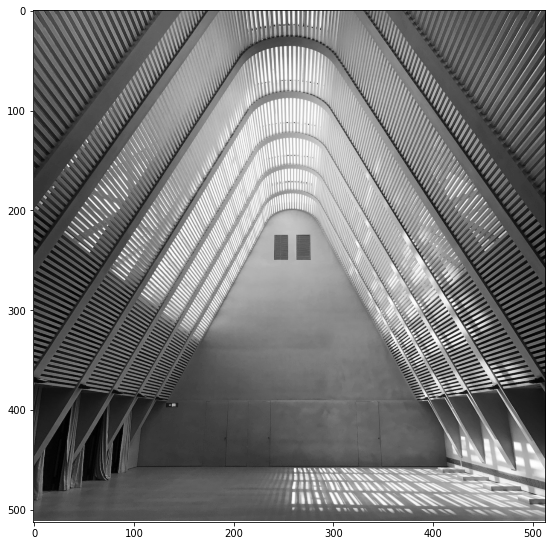

In [ ]:
display_image(ima,size=1)

Compute the maximum and minimum gray level value of the image. This information will be used to define the padding. 

In [ ]:
maxval = np.amax(ima)
minval = np.amin(ima)
print("Max=",maxval,", Min=",minval)

Max= 0.9995858612831748 , Min= 0.0033481194751113193


## 2 Erosion and Dilation
The two basic operators created in a lattice are the dilation and the erosion. Compute the erosion and dilation of the image with the  structuring element se1. The mode='constant' indicates that a constant padding is done outside the image with a value defined by cval. In order to avoid noticing the influence of the padding, in the case of the dilation  (erosion), the padding value is defined as minval (maxval). For example, in the case of dilation a max will be computed and the values inside the image will always be greater than or equal to minval. 

Note: In order to precisely see the image content, you may modify the size parameter involved in the display_image call.


<ipython-input-28-bf99a2c83248>:14: MatplotlibDeprecationWarning: The resize method was deprecated in Matplotlib 3.6 and will be removed two minor releases later. Use FigureManagerBase.resize instead.
  h.figure.canvas.resize(img.shape[1] + 1, img.shape[0] + 1)


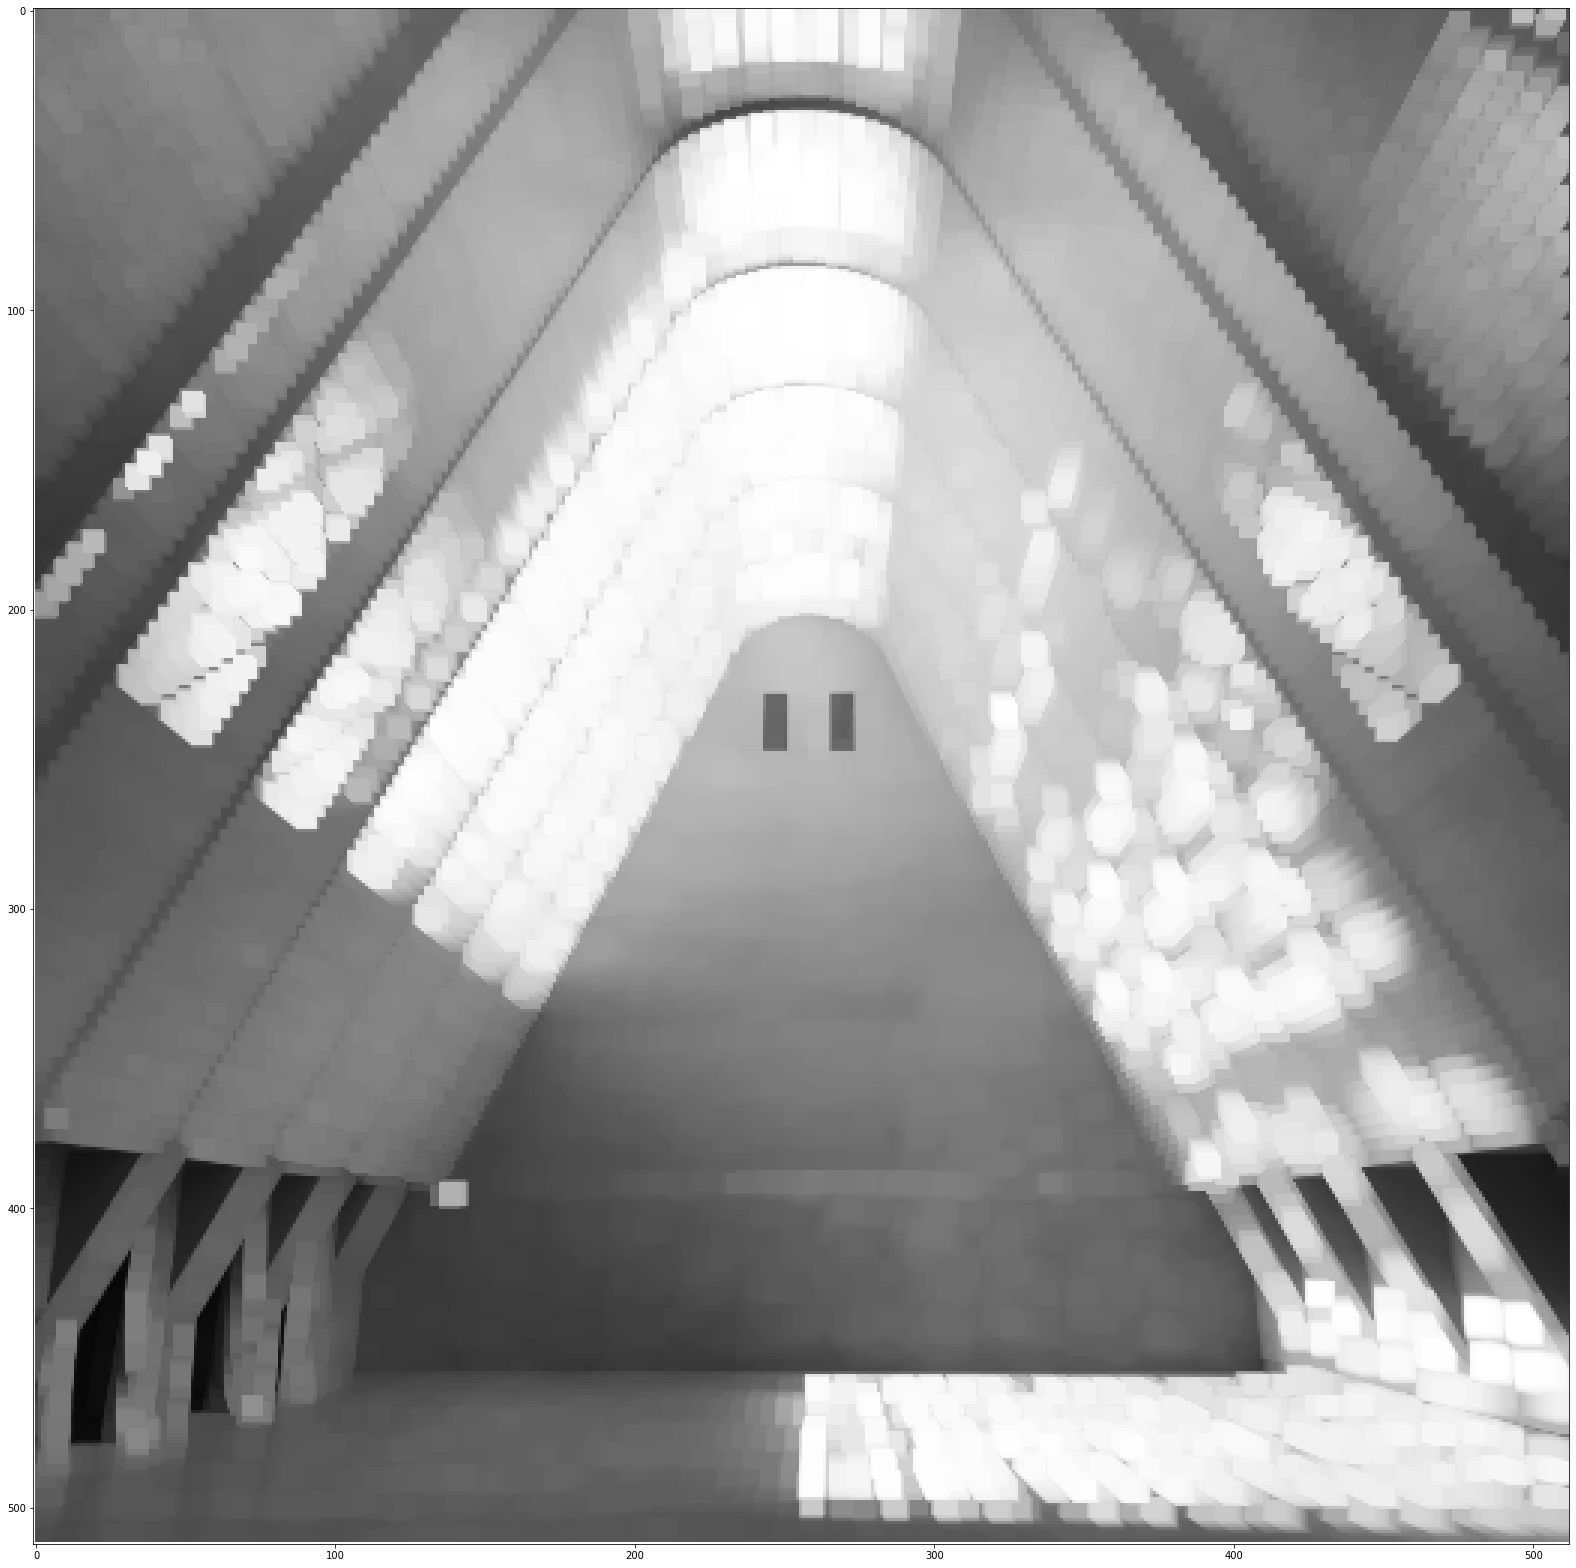

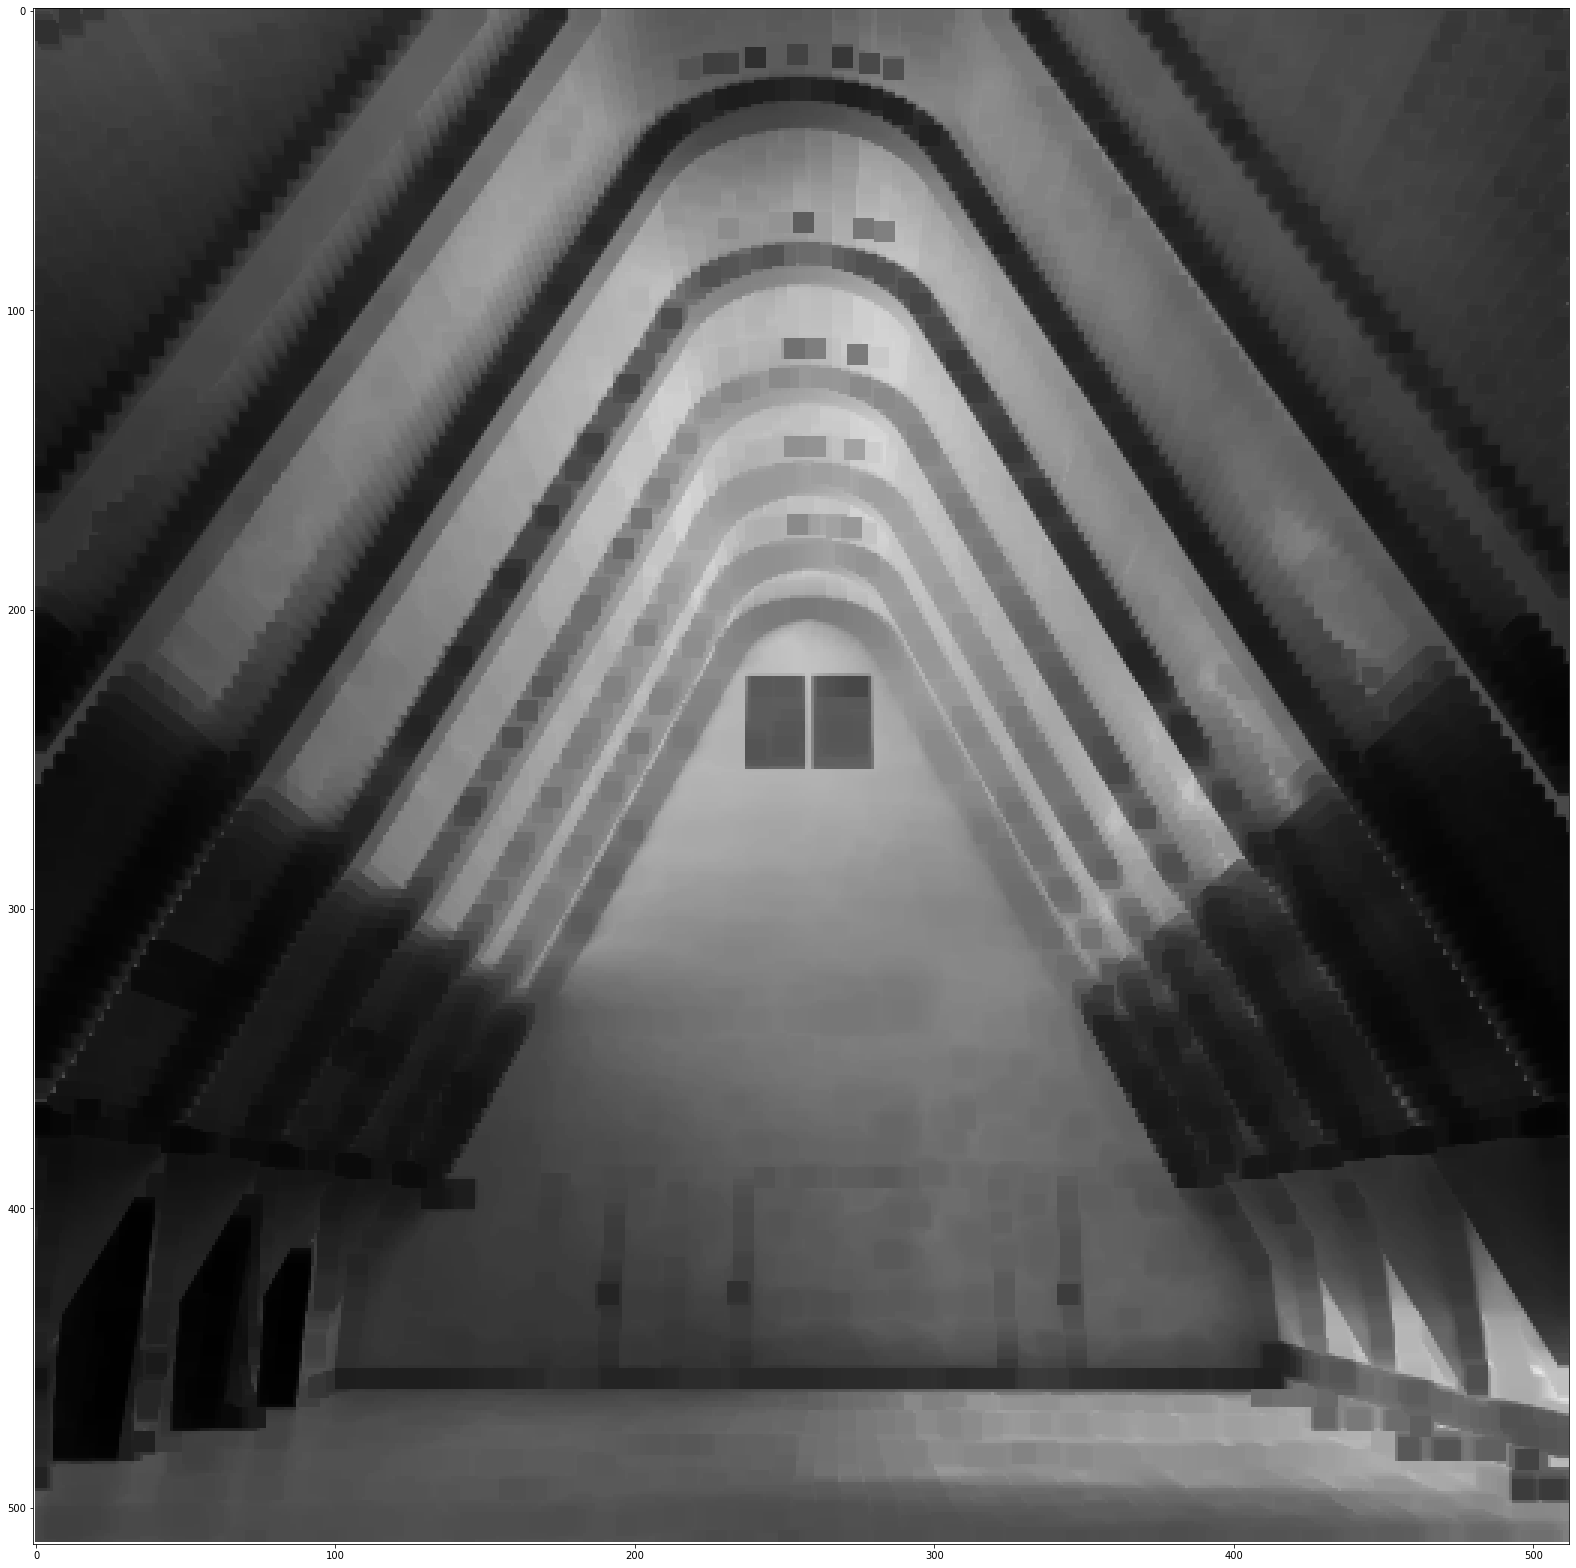

In [ ]:
ima_dil1 = ndimage.grey_dilation(ima, footprint=se1, mode='constant', cval=minval)
ima_ero1 = ndimage.grey_erosion (ima, footprint=se1, mode='constant', cval=maxval)

display_image(ima_dil1,size=3)
display_image(ima_ero1,size=3)

<font color='purple'> Describe intuitively the processing results: </font>

---
<font color='red'>Answer: 
Using dilation we obtain a clearer image, that is, with pixel values ​​higher than the original. This is because when we perform a dilation, we keep the maximum value of the pixels where the structuring element acts. On the other hand, erosion causes the opposite, we keep the minimum value of the pixels where the structuring element acts, causing a darker result. We can take as an example the windows in the middle of the wall; with dilation, these become smaller, since when the structuring element (in this case a square) acts with a part on the wall and another on the window, it keeps the value of the wall since it is higher, thus reducing the size of the windows (a dark part remains since, as the structuring element is smaller than the window and the whole thing is dark, when it acts inside it, it keeps the maximum value of some low-value pixels). On the other hand, with erosion, we see the opposite effect, where the structuring element acts with a part of the window and another of the wall, it keeps the pixels of darker value (those that form the window) and in this way, it expands. We can also see that due to the fact that the structuring element is a square larger than the spaces in the roof grille, these are almost eliminated or more difficult to distinguish in both cases and only squares are seen in the joints. 

</font> 

Do the same experiment with se2

<ipython-input-28-bf99a2c83248>:14: MatplotlibDeprecationWarning: The resize method was deprecated in Matplotlib 3.6 and will be removed two minor releases later. Use FigureManagerBase.resize instead.
  h.figure.canvas.resize(img.shape[1] + 1, img.shape[0] + 1)


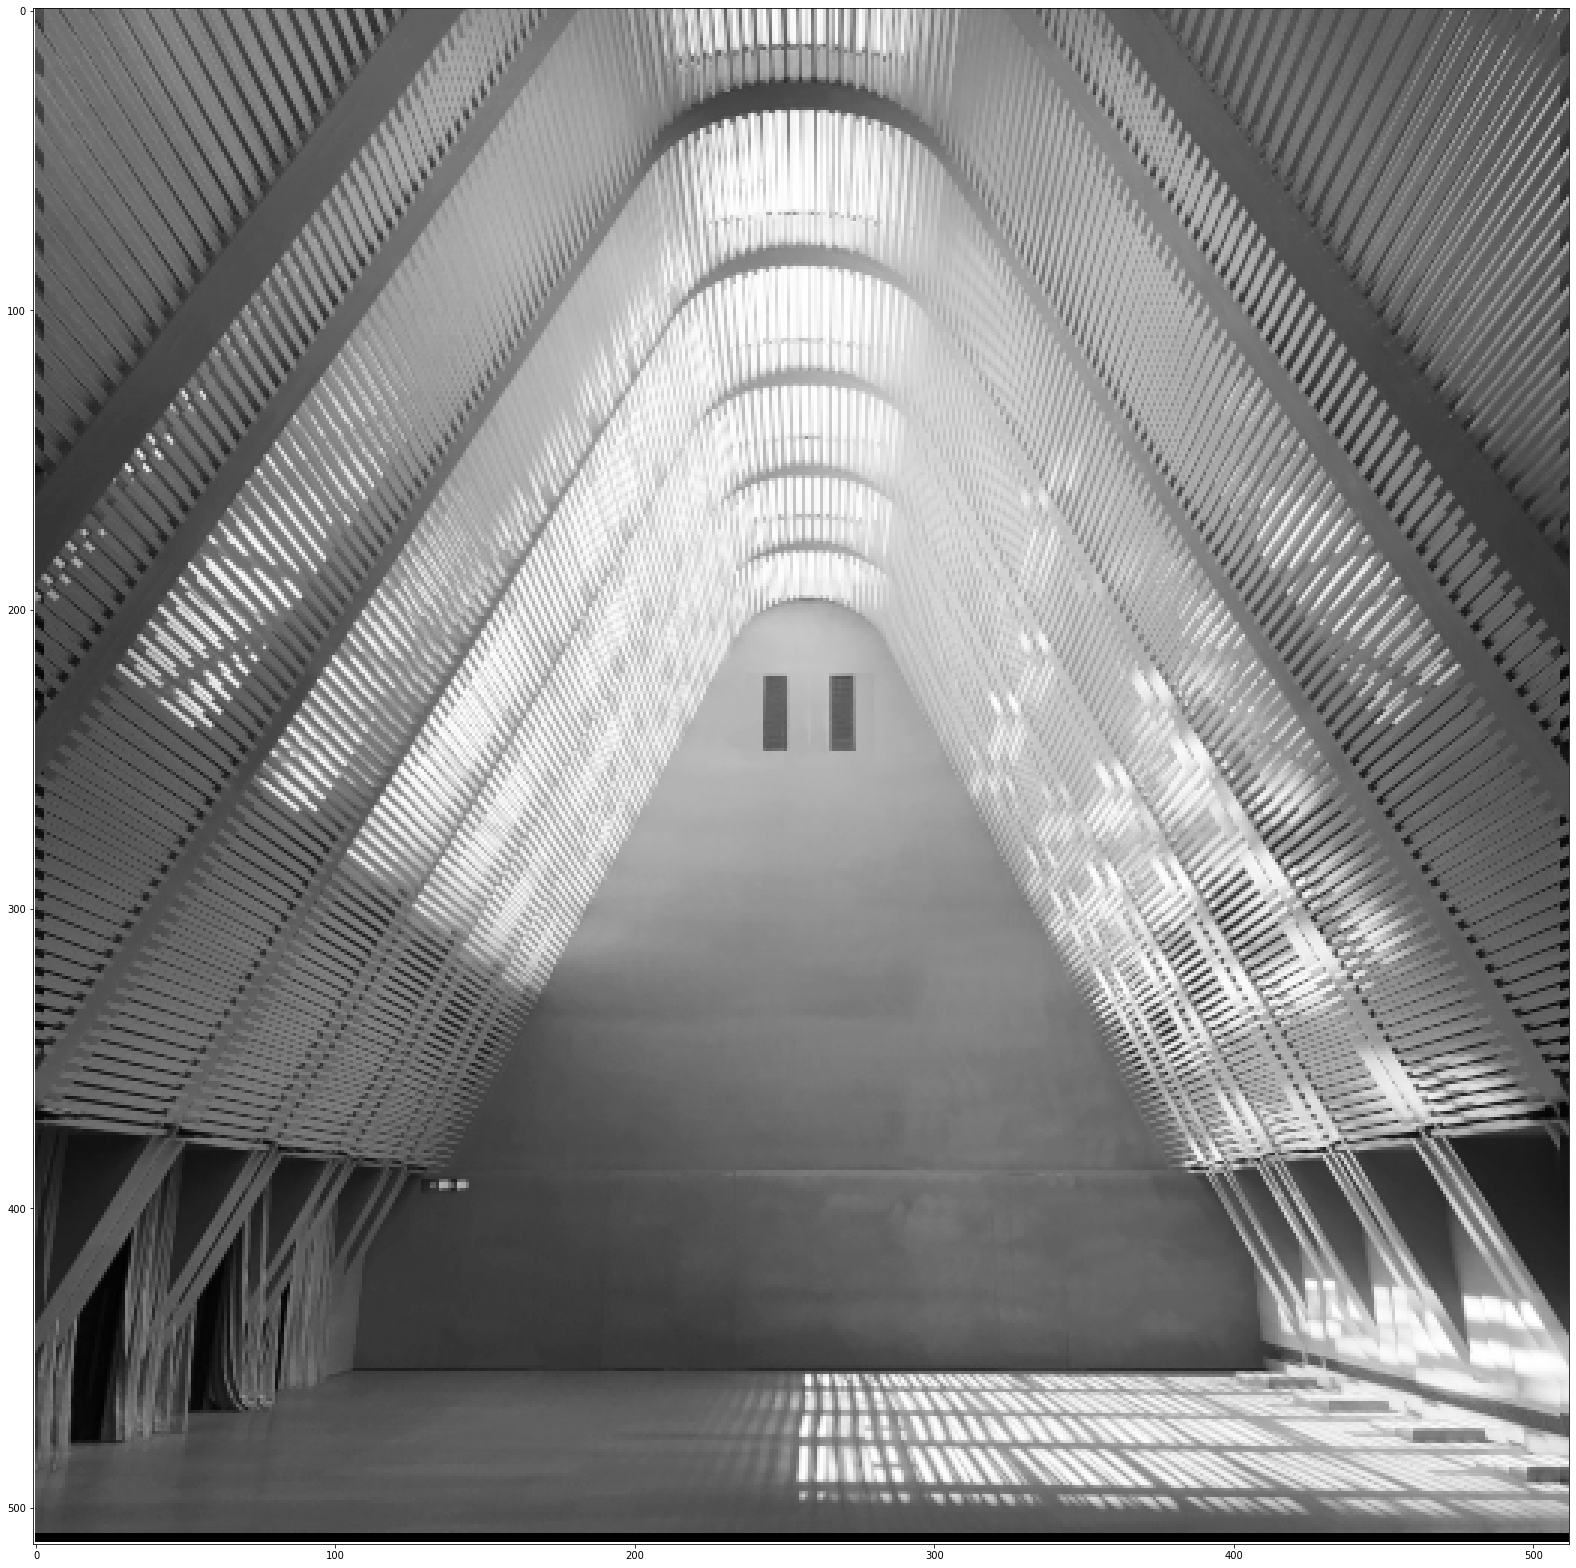

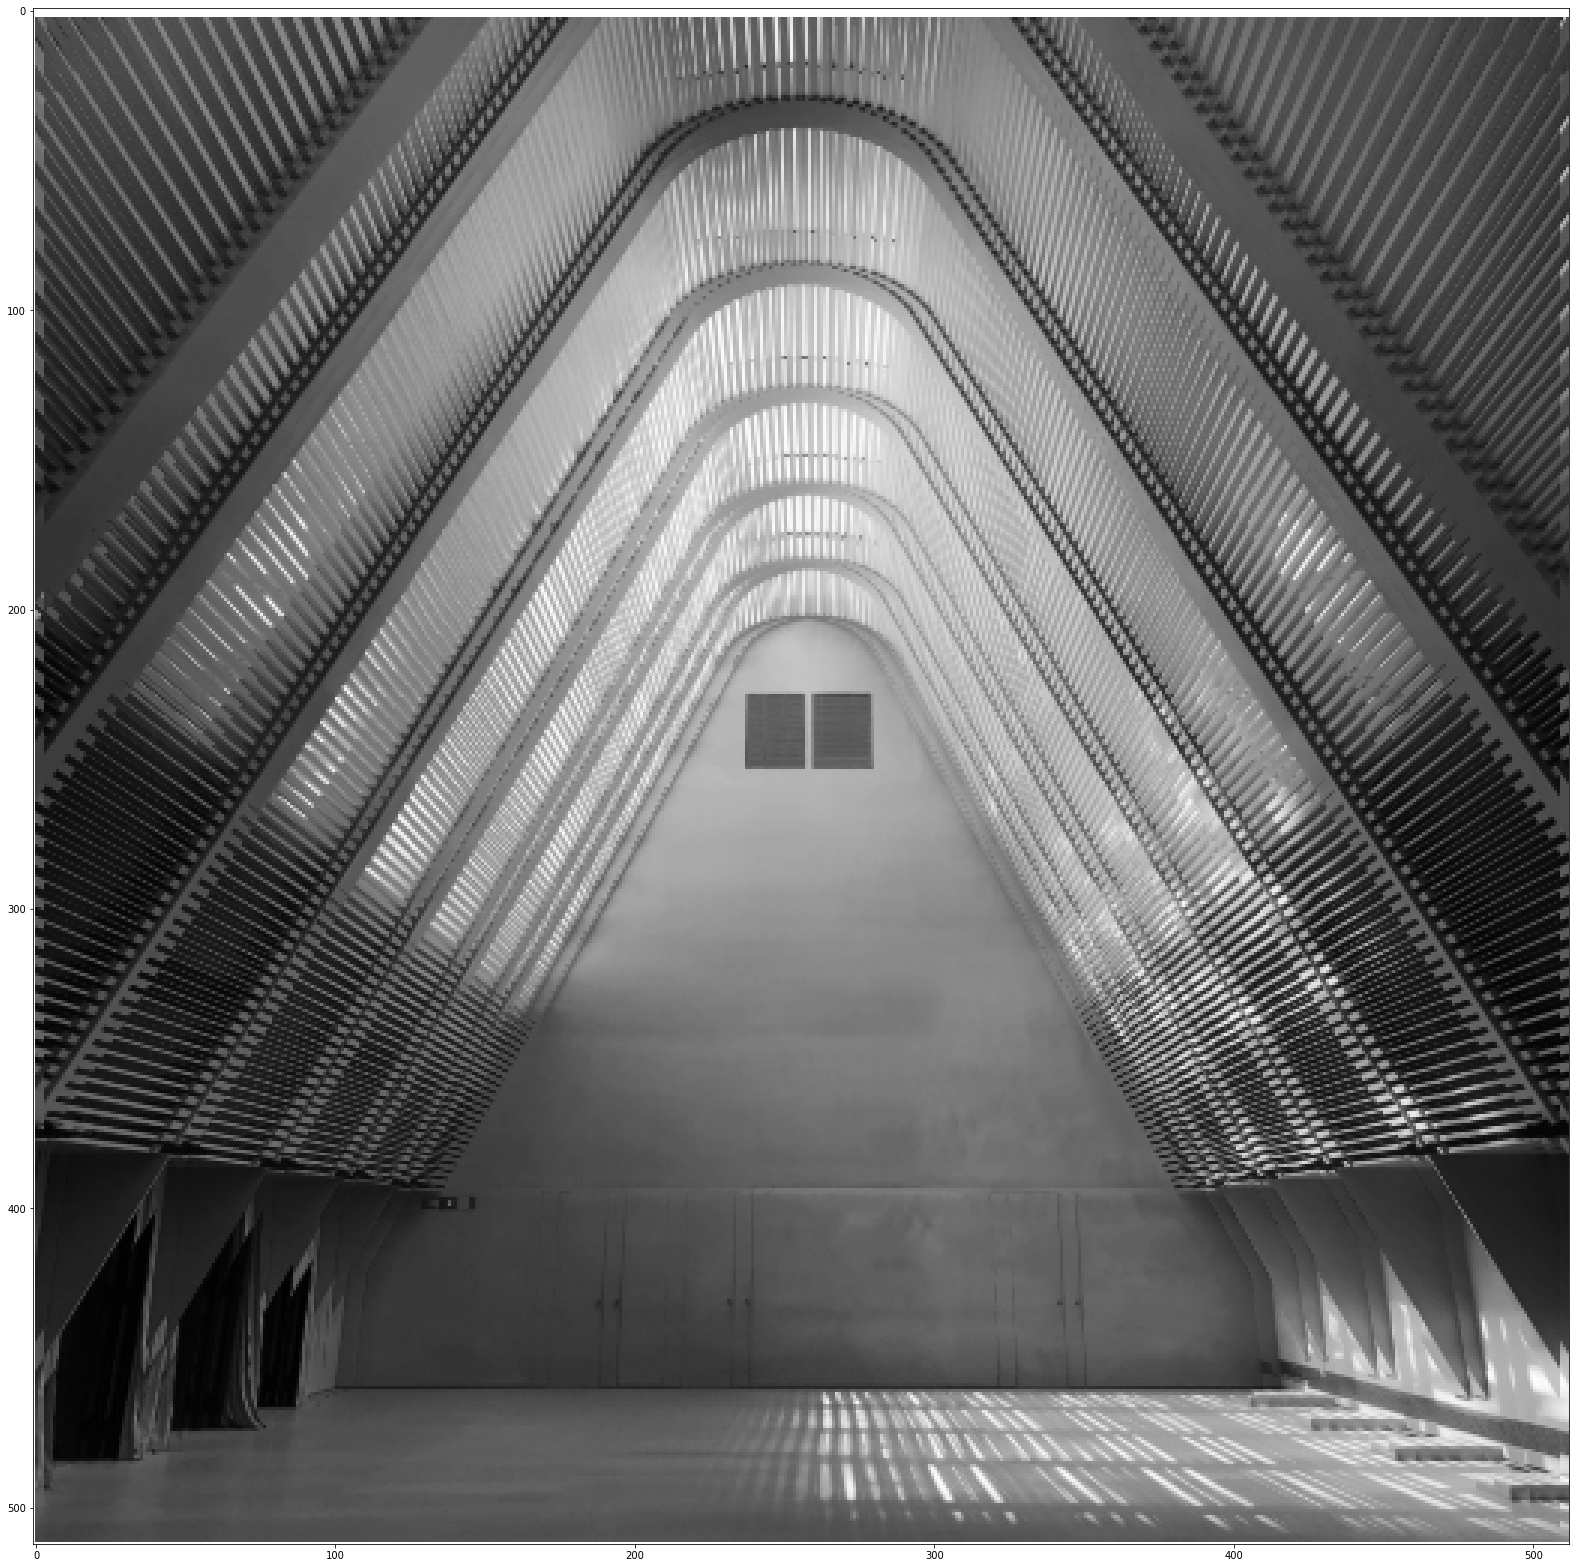

In [ ]:
ima_dil2 = ndimage.grey_dilation(ima, footprint=se2, mode='constant', cval=minval)
ima_ero2 = ndimage.grey_erosion (ima, footprint=se2, mode='constant', cval=maxval)

display_image(ima_dil2,size=3)
display_image(ima_ero2,size=3)

<font color='purple'> Describe intuitively the processing results. Here in particular, we suggest to visualize the image after a strong zooming so that you can precisely observe what is going on. Look in particular at the four corners of the image.... some surprising gray level values are appearing in some of the image corners. Interpret why they are appearing and justify their number as well as gray level values.  : </font>

---
<font color='red'>Answer: 
On the one hand, when we zoom in on the image, we can observe that there are some surprising gray level values appearing in some of the image corners (we can see strange black level values at the left part of the dilation result and some gray ones at the same part of the erosion result). These values are a result of the edges of the structuring element overlapping with the edges of the image, one part on the padding and the other on the original image. Since the structuring element has a mix of white and black pixels due to the padding, the overlapping areas result in intermediate gray values that are a combination of the white and black pixels. The number of gray level values appearing in each corner is determined by the number of overlapping pixels.

On the other hand, we can appreciate a black line at the bottom of the dilation result. This happens due to the fact that we have applied padding with pixels of value minval (black pixels). Therefore, as the structuring element has two little squares on the top left and right corners (at the same row or 'height'), the maxvalue of the pixels in the se2 when applying it on the edge of the image is minval (as this little squares are overlapping on the padding) so they remain black. 
As for the erosion, it appears a white line on the top of the resulting image. The change of positioning of the line is because in erosion the structuring element is flipped. Therefore, flipping se2 results in having the ones at the bottom left and right corners, applying the se at the edge of the image we obtain the maxval of the padding at the top edge (so the minimum value will also be maxval).

Dilation:
$$\delta_b\{x[n]\}=\vee (x[k]+b[n-k])$$

Erosion:

$$ \epsilon_b\{x[n]\}=\wedge (x[k]-b[k-n])=x[n]$$

k going from minus infinite to infinite.

In this formulas we can see the flip of the structuring element that I was talking about before.

</font> 

Do the same experiment with se3

<ipython-input-28-bf99a2c83248>:14: MatplotlibDeprecationWarning: The resize method was deprecated in Matplotlib 3.6 and will be removed two minor releases later. Use FigureManagerBase.resize instead.
  h.figure.canvas.resize(img.shape[1] + 1, img.shape[0] + 1)


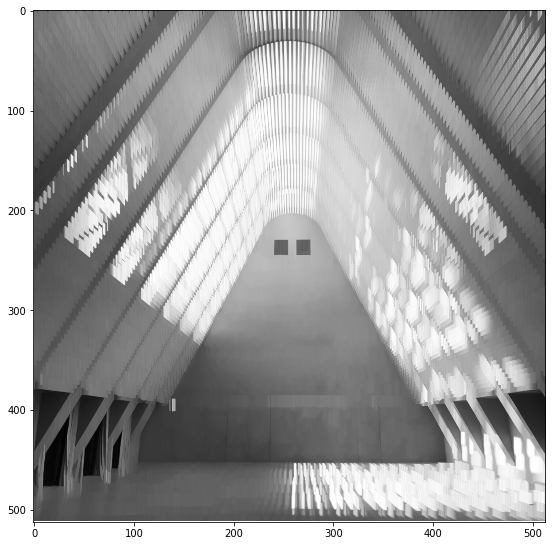

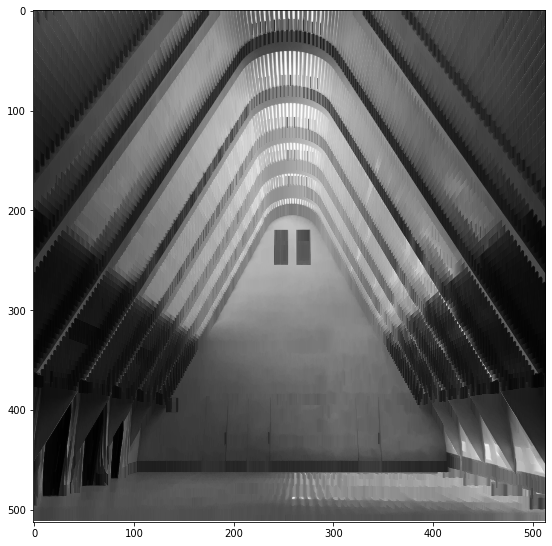

In [ ]:
ima_dil3 = ndimage.grey_dilation(ima, footprint=se3, mode='constant', cval=minval)
ima_ero3 = ndimage.grey_erosion (ima, footprint=se3, mode='constant', cval=maxval)

display_image(ima_dil3,size=1)
display_image(ima_ero3,size=1)

<font color='purple'> Describe intuitively the processing results: </font>

---
<font color='red'>Answer:
Since the structuring element is a vertical line, we can see how in dilation the windows that appear in the center of the image become smaller and in erosion they become longer, while their width remains the same. 
In both cases, it can be seen how the vertical value changes (meaning changes of pixel values in the image) are almost eliminated (the gaps on the ceiling disappear or become a little blurry). This was evident as we are taking a single value for the pixels where the SE acts, which is a vertical line. Therefore, if the zones where these value changes  occur are smaller than the structuring element, they will disappear. Moreover, the horizontal changes of values are not very affected by the two operations performed on the original image. Finally, as usual, the resulting image from dilation is brighter than the original, and the resulting image from erosion is darker, since in the first case, we keep the maximum value of the pixels where the structuring element acts, and in the second case, we keep the minimum.
</font> 


## 3	Study of the properties of the erosion and of the dilation

1)	The composition or erosions (or of dilations) is equivalent to an erosion (or dilation). 

<font color='purple'> Based on this property, compute the erosion and the dilation of ima with a rectangular structuring element of size 13x23 (13 in horizontal and 23 in vertical) combining "ndimage.grey_dilation( )" and "ndimage.grey_erosion( )"  with se1, se2 and/or se3 (you are not allowed to create a new structuring element, but only to concatenate operations). Use the cell below to write the necessary commands:  </font>

<ipython-input-28-bf99a2c83248>:14: MatplotlibDeprecationWarning: The resize method was deprecated in Matplotlib 3.6 and will be removed two minor releases later. Use FigureManagerBase.resize instead.
  h.figure.canvas.resize(img.shape[1] + 1, img.shape[0] + 1)


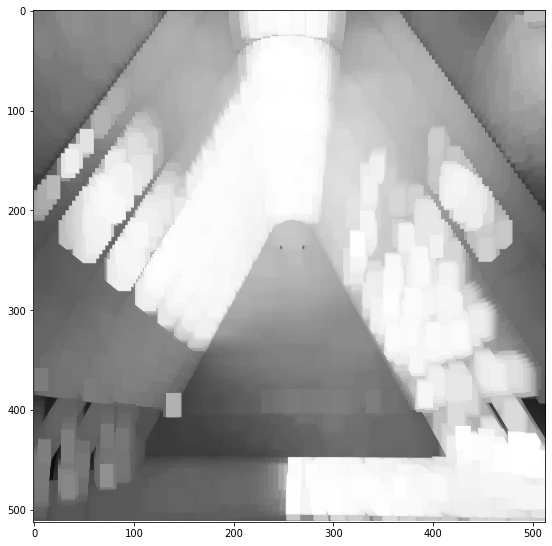

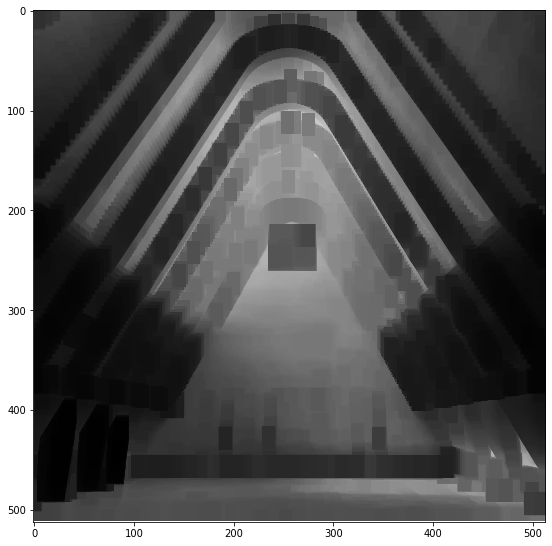

In [ ]:
# Compute an erosion and a dilation combining elementary erosions and dilations 
# with se1, se2, and/or se3 
ima_dil1_ = ndimage.grey_dilation(ima, footprint=se1, mode='constant', cval=minval)
ima_dil2_ = ndimage.grey_dilation(ima_dil1_, footprint=se1, mode='constant', cval=minval)
ima_dil3_ = ndimage.grey_dilation(ima_dil2_, footprint=se3, mode='constant', cval=minval)

ima_ero1_ = ndimage.grey_erosion(ima, footprint=se1, mode='constant', cval=maxval)
ima_ero2_ = ndimage.grey_erosion(ima_ero1_, footprint=se1, mode='constant', cval=maxval)
ima_ero3_ = ndimage.grey_erosion(ima_ero2_, footprint=se3, mode='constant', cval=maxval)
display_image(ima_dil3_, size=1)
display_image(ima_ero3_,size=1)



<font color='purple'> Describe and justify the strategy you have been using:  </font>
  
  
---
<font color='red'>Answer:
As we know from theory, the dilation is extensive if and only if the origin belongs to the structuring element. Therefore, using structuring elements with the space origin belonging to them the concatenation can be done to create the se demanded. 
The resulting se of the concatenation of two structuring elements will have the following size:
$$se_1+se_2-1 \times se_1+se_2-1$$
$se_x$ being the se size.
having said that, to achieve the size aske, i have strated concatenating $se_1$ with itself:
$$7+7-1 \times 7+7-1=13 \times 13$$
Then, I have used $se_3$ to get the 26 value of the vertical part of the structuring element:
$$13+1-1 \times 13+11-1= 13 \times 23$$

Because of the big size of se4, the results of the dilation and erosion has lost pretty much all of the contours of the images. Furthermore, it can be appreciated the rectangles of se4 with the same pixels values, brigther in dilation, darker in erosion.
Let's check if we get the same results without the concatenation and just using the new structuring element created:
</font> 



<ipython-input-28-bf99a2c83248>:14: MatplotlibDeprecationWarning: The resize method was deprecated in Matplotlib 3.6 and will be removed two minor releases later. Use FigureManagerBase.resize instead.
  h.figure.canvas.resize(img.shape[1] + 1, img.shape[0] + 1)


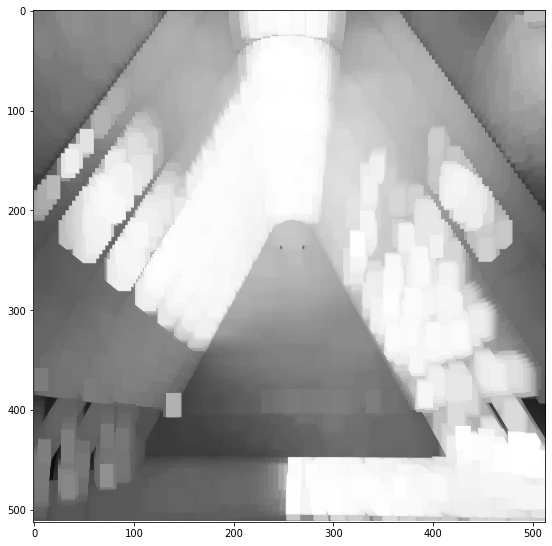

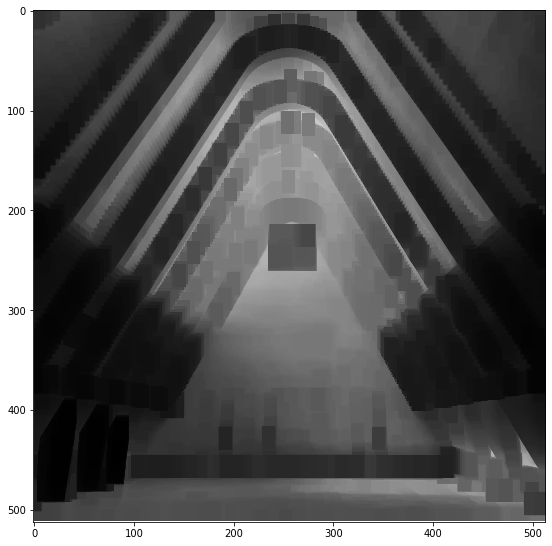

In [ ]:
se4=np.ones((23,13))
img_dil_se4=ndimage.grey_dilation(ima, footprint=se4, mode='constant', cval=minval)
display_image(img_dil_se4, size=1)
img_ero_se4 = ndimage.grey_erosion(ima, footprint=se4, mode='constant', cval=maxval)
display_image(img_ero_se4, size=1)


<font color='red'>Answer:
As it can be seen, the result is exactly the same as when we concatenated the other structuriing elements.
</font> 

2)	The dilation is extensive if and only if the space origin belongs to the structuring element. 

<font color='purple'> To verify this property, compute the difference between the input ant the output of a dilation and study the dynamical range of this difference. Analyze the cases of se2 and se3:  </font>


In [ ]:
difference_se2 = ima_dil2 - ima;
print("Difference: max", np.amax(difference_se2), ", min", np.amin(difference_se2))

difference_se3 = ima_dil3 - ima;
print("Difference: max", np.amax(difference_se3), ", min", np.amin(difference_se3))
#diu el profe que aquesta diferencia hauria de ser molt gran

Difference: max 0.8593314248327619 , min -0.7438231470148287
Difference: max 0.8496315705644597 , min 0.0


<font color='purple'> What conclusions can be drawn from the figures obtained in the cell above?  </font>

---

<font color='red'>Answer:
The dynamic range of se3 goes from 0 to 0.85, meaning that the result of the dilation is greater or equal than the origina image. If the space origin belongs to the structuring element, this makes sense as the dilation computes the maximum of the pixels overlapped it, so it is not possiblo to have lower values than the pixel the se is centered. 
On the other hand, the space origin does not belong to se2 so the dynamic range goes from -0.74 to 0.86. This means that now the resulting image is not greaeter or equal and instead it also can be smaller. 
</font> 

## 4 Opening and closing
The morphological opening and the morphological closing are created from the composition of erosion and dilation.

<font color="purple">Compute an opening and a closing on ima with se1. Create the opening and the closing from "ndimage.grey_dilation( )" and "ndimage.grey_erosion( )". Display them. Use the cell below to write the necessary commands. </font>


<ipython-input-28-bf99a2c83248>:14: MatplotlibDeprecationWarning: The resize method was deprecated in Matplotlib 3.6 and will be removed two minor releases later. Use FigureManagerBase.resize instead.
  h.figure.canvas.resize(img.shape[1] + 1, img.shape[0] + 1)


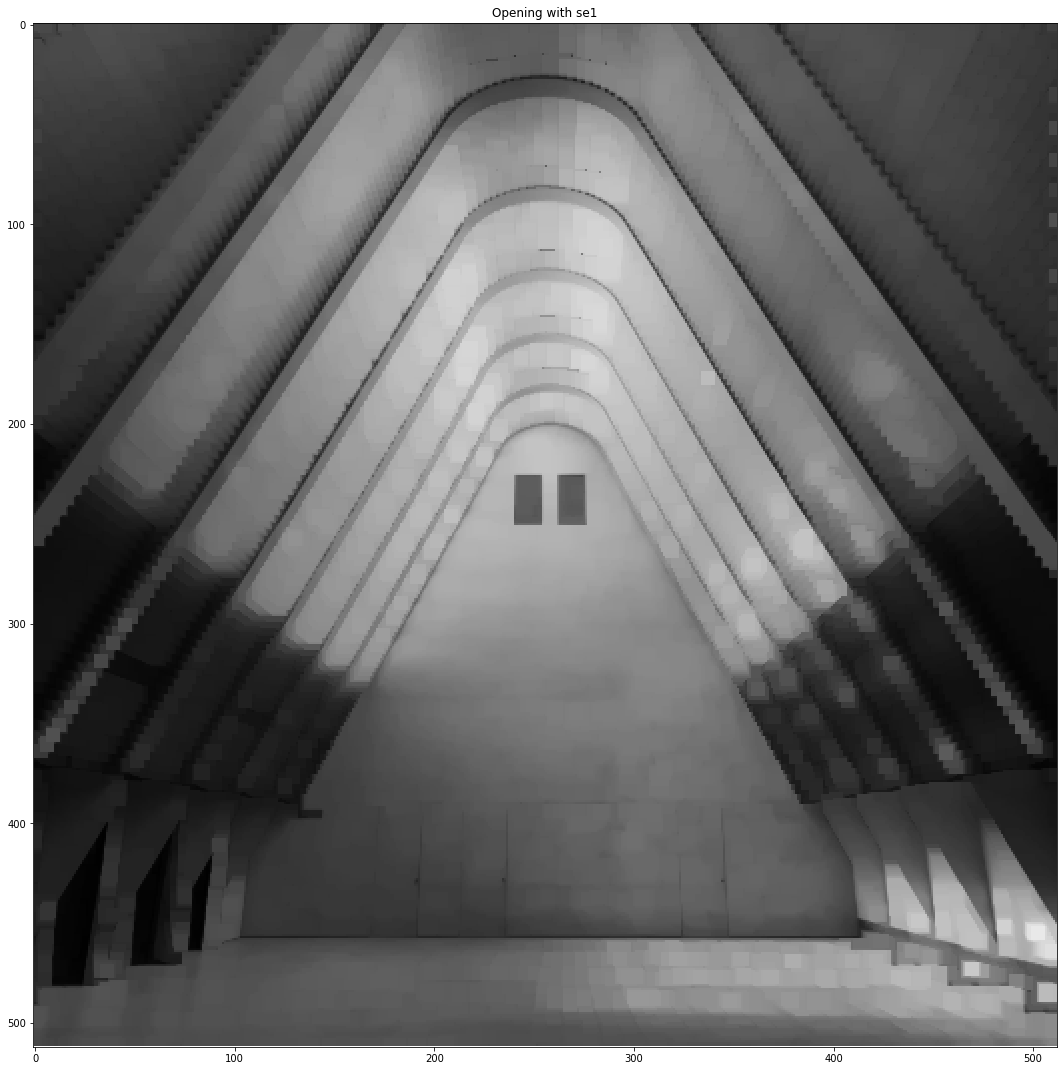

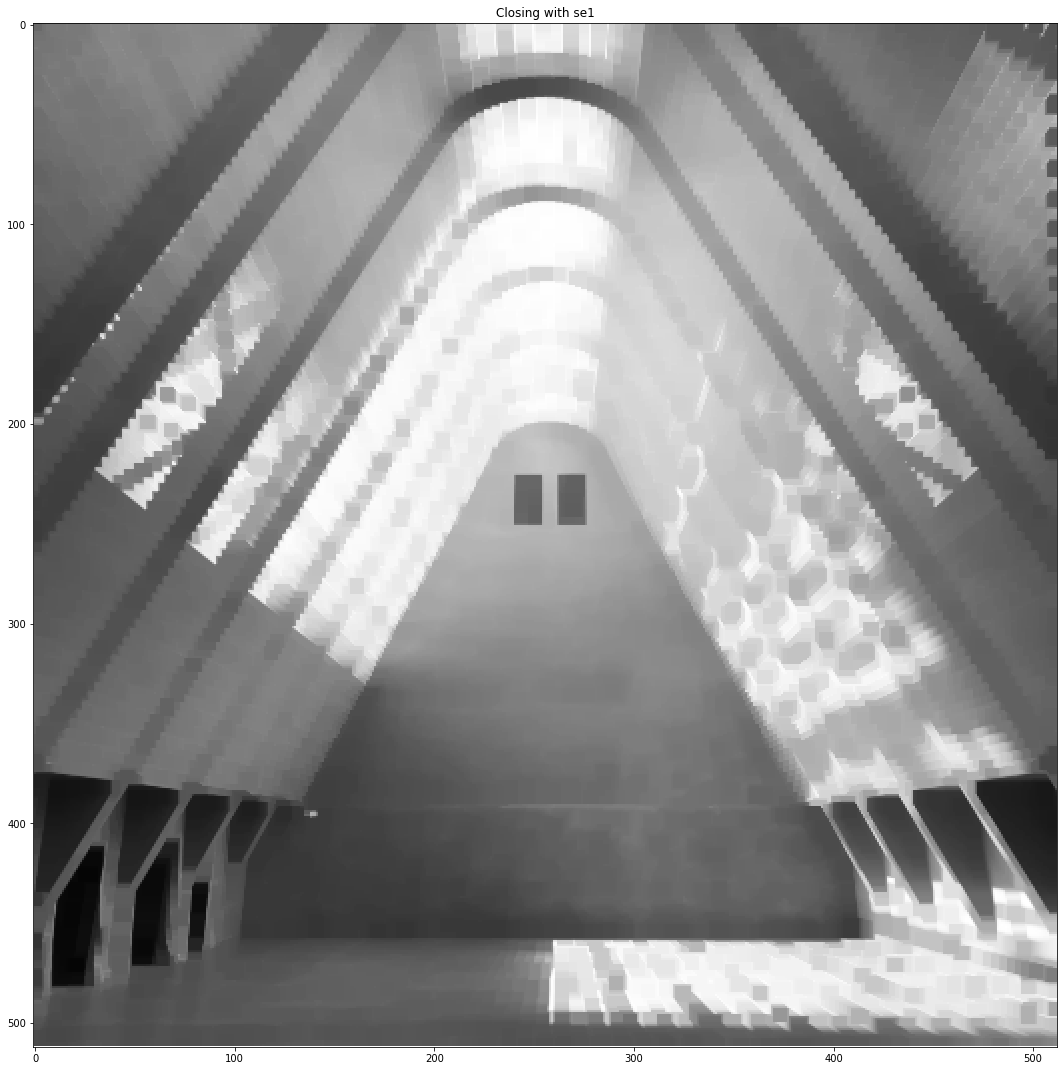

In [ ]:
# Compute an opening and a closing by combining elementary erosion and dilation

# Opening
ima_open = ndimage.grey_erosion(ima, footprint=se1)
ima_open = ndimage.grey_dilation(ima_open, footprint=se1)

# Closing
ima_close = ndimage.grey_dilation(ima, footprint=se1)
ima_close = ndimage.grey_erosion(ima_close, footprint=se1)

# Display images
display_image(ima_open, title='Opening with se1', size=2)
display_image(ima_close, title='Closing with se1', size=2)




<font color='purple'> Describe intuitively the processing effect:  </font>

---

<font color='red'>Answer:
The opening operation has removed small white regions that are narrower than the width of the structuring element, such as the white dots on the vertical lines of the image. This is because the erosion operation with the structuring element first contracts the white regions and then the dilation operation with the same structuring element expands the contracted regions, resulting in the removal of the small white regions.

On the other hand, the closing operation has filled small black gaps that are narrower than the width of the structuring element, such as the gaps between the vertical lines and the horizontal lines of the image. This is because the dilation operation with the structuring element first expands the black regions and then the erosion operation with the same structuring element contracts the expanded regions, resulting in the filling of the small black gaps.
</font> 

## 5	Study of the properties of the opening and of the closing:
From now on we are going to use the skimage [skimage](http://scikit-image.org/docs/stable/api/api.html) package which also includes morphological operations. The opening (closing) can be directly computed with morphology.opening (morphology.closing). 



In [ ]:
from skimage import morphology

#Example of opening and closing with skimage
ima_ope  = morphology.opening(ima,se1)
ima_clo  = morphology.closing(ima,se1)

The opening is anti-extensive, increasing and idempotent, whereas the closing is extensive, increasing and idempotent. 

<font color="purple"> Using the structuring elements se1 and the commands np.amax() and np.amin(), define two experiments to verify the properties of idempotence and anti-extensivity of the opening. Write the  code below. </font>



In [ ]:
# Write the code to verify that an opening is idempotent
import skimage
ima_open1 = morphology.opening(ima, selem=se1)
ima_open2 = morphology.opening(ima_open1, selem=se1)

diff_open = np.abs(ima_open1 - ima_open2)
print("Idempotence Test - Maximum Difference:", np.amax(diff_open))
print("Idempotence Test - Minimum Difference:", np.amin(diff_open))


# Write the code to verify that an opening is antiextensive


print("Anti-extensivity of opening:", np.amax(ima_open1) <= np.amax(ima) and np.amax(ima_open2) <= np.amax(ima))




Idempotence Test - Maximum Difference: 0.0
Idempotence Test - Minimum Difference: 0.0
Anti-extensivity of opening: True


/usr/local/lib/python3.9/dist-packages/skimage/_shared/utils.py:274: FutureWarning: `selem` is a deprecated argument name for `opening`. It will be removed in version 1.0. Please use `footprint` instead.
  warnings.warn(self.warning_msg.format(


<font color='purple'> Describe your experiments and their outcome:  </font>

---

<font color='red'>Answer: 
Idempotence means that performing an opening operation twice on an image should result in the same image as performing it only once. To test this, I have applied an opening operation twice on the original image using the same structuring element se1 and then I have computed he maximum and minimum differences between the two results  using np.amax() and np.amin() respectively. If the results are both zero, it indicates that the opening operation is indeed idempotent.
Perhaps, the conditions are met so the opening operation is idempotent.

</font> 

-

<font color='red'>Answer: 
Anti-extensivity means that the opening operation reduces the size of objects in the image and therefore should not increase their size when applied to a larger image. I check that the maximum pixel value in the opening result is not greater than the maximum pixel value in the original image. If this condition holds true for both the opening result and the original image, it means that the opening operation is anti-extensive. Again, this conditions are met so we can assure that the opening operation is anti-extensive
</font> 


## 6	Filters by reconstruction
Filters by reconstruction use a "marker" image to define the simplification effect. The marker is progressively dilated conditionally to the original image in order to reconstruct the contours of the components that have not been completely removed. In the sequel, we analyse the simplification effect as a function of the strategy to create the "marker" image. 

**Binary image:**
Select the reference image "Tools.bmp" and the marker image "Mark.bmp" and compute the reconstruction. Note that the marker image has to be lower or equal to the reference image (this is enforced by the np.minimum)



<ipython-input-28-bf99a2c83248>:14: MatplotlibDeprecationWarning: The resize method was deprecated in Matplotlib 3.6 and will be removed two minor releases later. Use FigureManagerBase.resize instead.
  h.figure.canvas.resize(img.shape[1] + 1, img.shape[0] + 1)


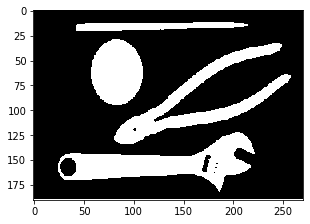

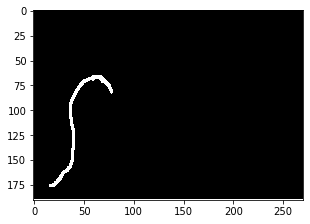

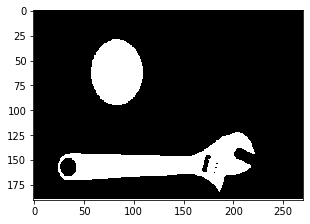

In [ ]:
ref = io.imread('/content/Data/Tools.bmp',as_gray=True)
mar = io.imread('/content/Data/Mark.bmp', as_gray=True)
display_image(ref,size=1)
display_image(mar,size=1)

mar1 = np.minimum(mar,ref)
rec = morphology.reconstruction(mar1, ref, method='dilation')
display_image(rec,size=1)

<font color='purple'> Comment and justify the result:  </font>

---

<font color='red'>Answer:
The reconstruction result shows a simplified version of the "Tools" image where the pliers and the stick have been removed. This is because the "Mark" image serves as a marker for the reconstruction process, and only the features that are present in the "Mark" image are preserved in the final result (in this case, the circle and the wrench). 

The choice of the marker image can greatly affect the result of the reconstruction. If the marker image contains more details, then the final result will also contain more details. On the other hand, if the marker image is too simple, then important features of the original image might also be lost. 
</font> 

Let us now compute the dual reconstruction. 

<ipython-input-28-bf99a2c83248>:14: MatplotlibDeprecationWarning: The resize method was deprecated in Matplotlib 3.6 and will be removed two minor releases later. Use FigureManagerBase.resize instead.
  h.figure.canvas.resize(img.shape[1] + 1, img.shape[0] + 1)


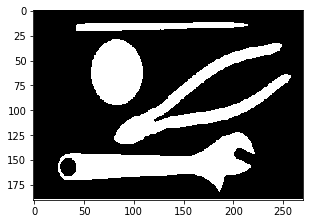

In [ ]:
mar2 = np.maximum(255-mar,ref)
rec = morphology.reconstruction(mar2, ref, method='erosion')
display_image(rec,size=1)

<font color='purple'> Why did we define mar2 as a function of 255-mar? Comment and justify the dual reconstruction result:  </font>

---

<font color='red'>Answer:
We defined mar2 as a function of 255-mar because the dual reconstruction requires a marker image that is greater than or equal to the reference image, while the original mar image was lower or equal to the reference image. Subtracting mar from 255 gives us this new marker image that will be the "opposite" of thhe previous one.
The dual reconstruction operation is essentially the reverse of the normal reconstruction operation. In the normal reconstruction operation, the marker image is dilated conditionally to the reference image, while in the dual reconstruction operation, the marker image is eroded conditionally to the reference image.
In this specific case, the dual reconstruction result fills in the gaps or holes that were left in the normal reconstruction result. This is because the normal reconstruction operation was removing some of the thin parts of the tools, while the dual reconstruction operation was filling them back in. The result is a more complete image of the original tools with fewer gaps and holes. For example, we can see that the pliers and the wrench have lost its holes in the process of the dual reconstruction.
</font> 

Let us now use as marker, an image that has been derived from the reference image itself. As an example, let us use the abolute maximum (or maxima) of the gray level image "ima". 

<ipython-input-28-bf99a2c83248>:14: MatplotlibDeprecationWarning: The resize method was deprecated in Matplotlib 3.6 and will be removed two minor releases later. Use FigureManagerBase.resize instead.
  h.figure.canvas.resize(img.shape[1] + 1, img.shape[0] + 1)


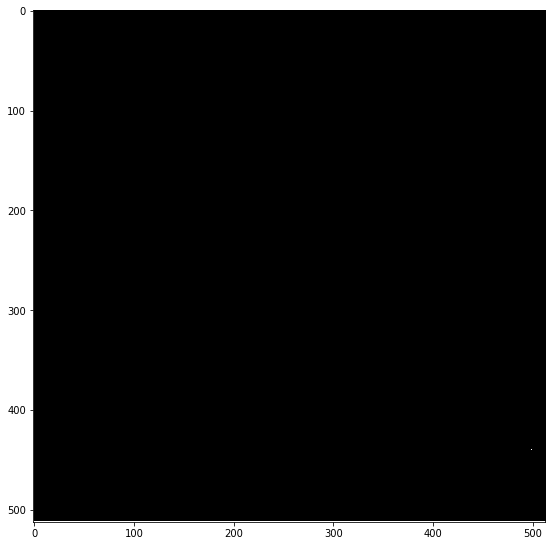

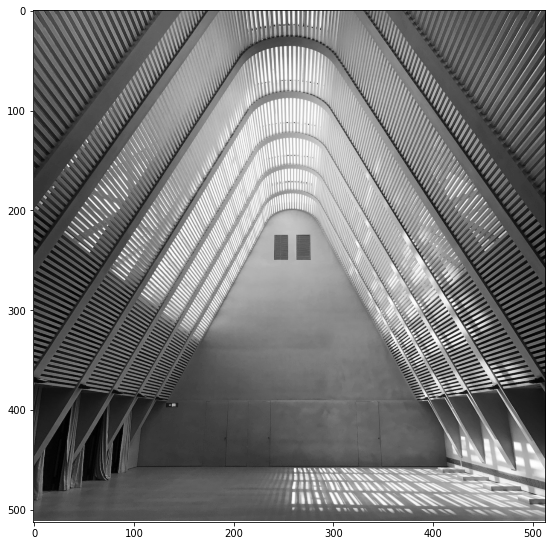

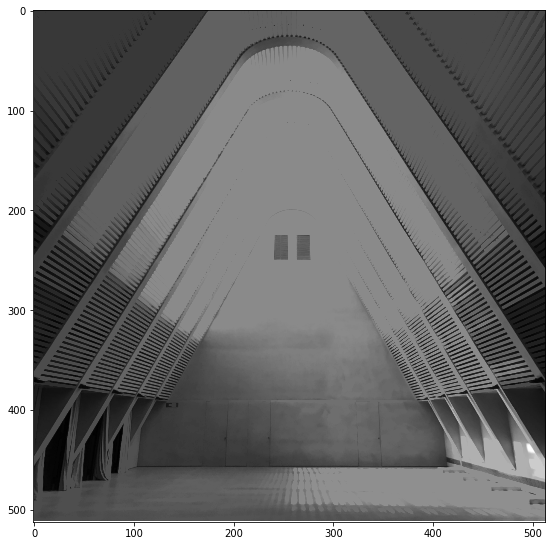

In [ ]:
# Define a marker image involving only the pixels corresponding to the absolute maxima of the image
mar3 = np.copy(ima)
mar3[mar3<maxval] = 0
display_image(mar3,size=1)


# Compute the reconstruction
rec = morphology.reconstruction(mar3, ima, method='dilation')
display_image(ima,size=1)
display_image(rec,size=1)

<font color='purple'> Comment and justify the result:  </font>

---

<font color='red'>Answer:
The reconstructed image is obtained by using the absolute maxima of the gray level image "ima" as the marker has preserved the high-intensity regions of the original image. "Mar3" consists of just a pixel with value maxval, we can find it as a little dot at the bottom right part of the image. This way we have a marker that includes only the brightest and most salient features of the original image.
By using this marker in the reconstruction process, we have essentially expanded the high-intensity regions of the marker image to include all pixels that are connected to it through a process of dilation. The dilation is performed in a way that keeps the expanded region connected to the marker, hence ensuring that the resulting image is a faithful representation of the original image.
It can be seen in the result that there has been a loss of detail in the ceiling of the building, which is normal as this process is particularly useful for extracting salient features from an image, such as bright regions in a dark background or edges of objects. This way, reconstruction can help us filter out irrelevant information and focus on the most relevant features of an image. 
</font> 

During the lecture, we have seen that a classical way to construct the marker image is to use an erosion on the original image. This leads to the so-called "opening by reconstruction of erosion". The following cells implement this function assuming the erosion is computed with the a new struturing element se4. 

<ipython-input-28-bf99a2c83248>:14: MatplotlibDeprecationWarning: The resize method was deprecated in Matplotlib 3.6 and will be removed two minor releases later. Use FigureManagerBase.resize instead.
  h.figure.canvas.resize(img.shape[1] + 1, img.shape[0] + 1)


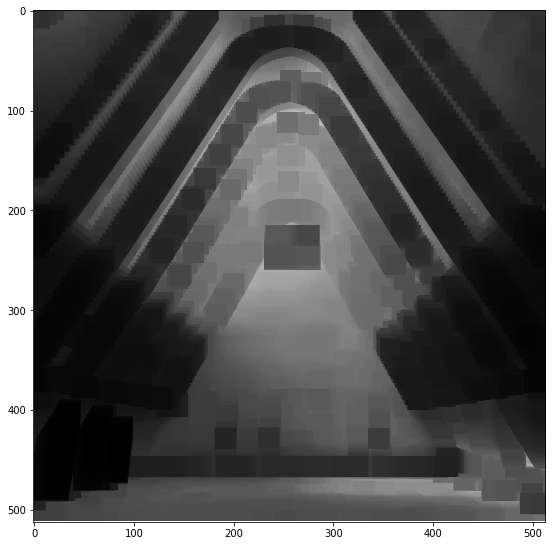

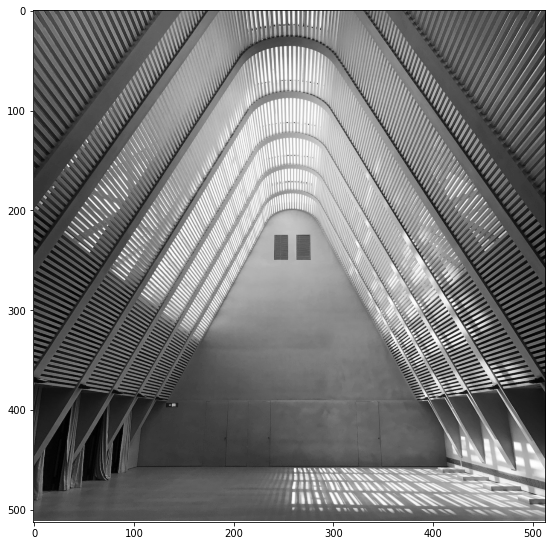

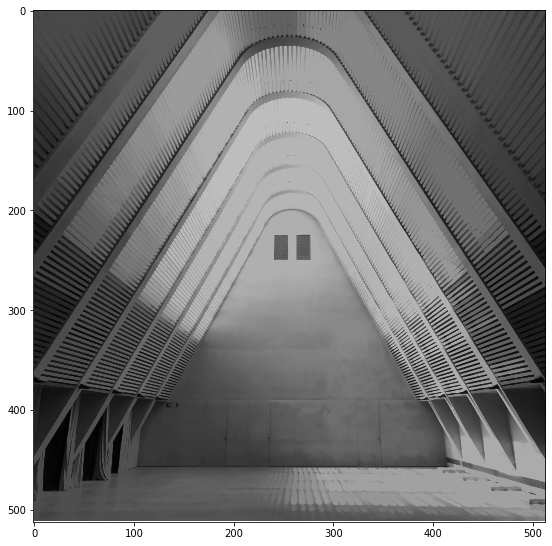

In [ ]:
# Define the marker as the erosion of ima with se1
se4 = np.ones((21,21))
mar4 = morphology.erosion(ima,se4)
display_image(mar4,size=1)

# Compute the reconstruction
rec = morphology.reconstruction(mar4, ima, method='dilation')
display_image(ima,size=1)
display_image(rec,size=1)

<font color='purple'> Comment and justify the result:  </font>

---

<font color='red'>Answer:
Now the marker image is constructed by performing an erosion of the original image "ima" using a large structuring element of size 21x21. The erosion operation removes the brighter regions and sharpens the boundaries of the objects in the image.
The reconstruction is then computed using the marker obtained by erosion of the original image. The result has the bright regions of the original image restored, but with sharper edges and more clearly separated from the background. 
In the result, we can see that the details of the different objects in the image are better defined, with more clearly separated boundaries and fewer blurry edges. This is because the opening operation removes small bright regions, while the reconstruction operation restores the larger, more prominent bright regions. This results in an image with better contrast and sharper edges.
</font> 

Implement now the dual operator, that is the closing by reconstruction of dilation (with se4)

<ipython-input-28-bf99a2c83248>:14: MatplotlibDeprecationWarning: The resize method was deprecated in Matplotlib 3.6 and will be removed two minor releases later. Use FigureManagerBase.resize instead.
  h.figure.canvas.resize(img.shape[1] + 1, img.shape[0] + 1)


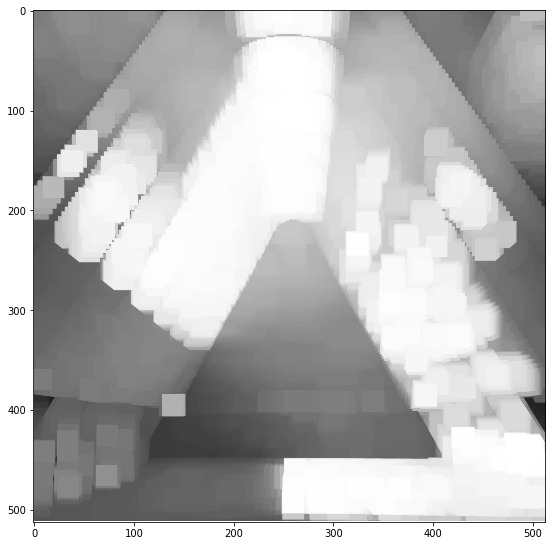

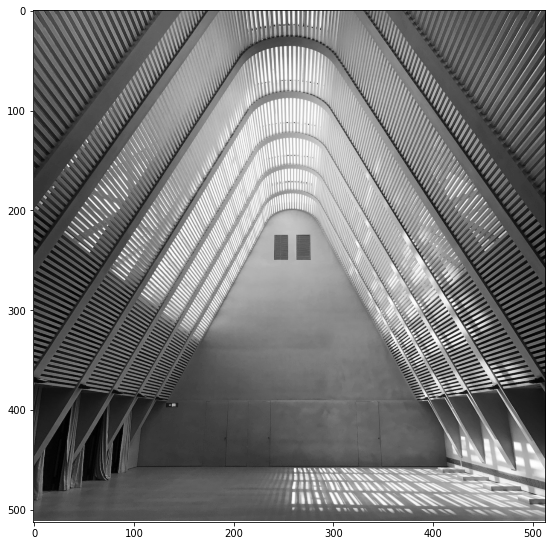

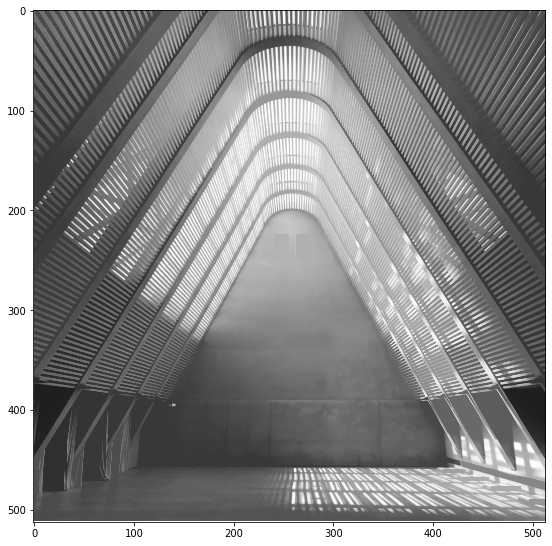

In [ ]:
# Implement a closing by reconstruction of dilation

# Define the marker as the dilation of ima with se4
mar5 = morphology.dilation(ima, se4)
display_image(mar5, size=1)

# Compute the reconstruction
rec = morphology.reconstruction(mar5, ima, method='erosion')
display_image(ima, size=1)
display_image(rec, size=1)





<font color='purple'> Comment and justify the result:  </font>

---

<font color='red'>Answer:
The result of the closing by reconstruction of dilation operation is an image where the bright structures that were smaller than the structuring element se4 in the original image have been enlarged until they reached a size that is comparable to the size of the structuring element. This is because the operation consists of a dilation followed by a reconstruction, where the dilation enlarges the bright structures and the reconstruction keeps only the regions that are connected to the markers (in this case, the bright regions after dilation).
Compared to the original image, the operation reduces the number of small bright structures and merges them into larger ones, resulting in a smoother and less noisy image. This can be useful, for example, in image segmentation tasks where small structures are not relevant for the analysis and can be discarded.
Let's take a look at the black windows in the middle of the image, they were filled with the reconstructed value because they were completely surrounded by pixels with higher intensity values. The reconstruction by dilation process fills in the missing values in the black windows by propagating the maximas from the marker image. This happens because the marker has high values in the areas that should be preserved during the reconstruction process. Therefore, the closing by reconstruction of dilation is able to fill in the missing values in the black windows while preserving the overall structure of the original image.
</font> 

## Granulometry

In this last section, we analyze the notion of granulometrry and its potential use as texture descriptor. To this end, we will use a small texture dataset made of woven fabric images. 


Select one of the image (modify the first line of the following cell) and compute its granulormetic curve. 

<ipython-input-28-bf99a2c83248>:14: MatplotlibDeprecationWarning: The resize method was deprecated in Matplotlib 3.6 and will be removed two minor releases later. Use FigureManagerBase.resize instead.
  h.figure.canvas.resize(img.shape[1] + 1, img.shape[0] + 1)


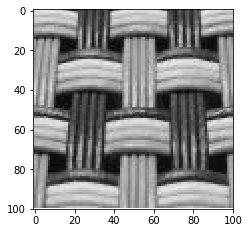

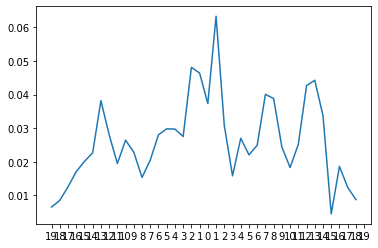

In [ ]:
# Choose the image to be analysed
Texture = io.imread('/content/Data/Woven/woven_0121.jpg',as_gray=True)/256

# Compute the pattern sepctrum with a serie of opening and closing with a circular 
# structuring element
n=20
sizes   = np.arange(1,n,1)
val_ori   = Texture.sum()
val_open  = [morphology.opening(Texture, morphology.disk(n)).sum() for n in sizes]
val_close = [morphology.closing(Texture, morphology.disk(n)).sum() for n in sizes]
Granulometry     = np.concatenate((np.flip(val_close),[val_ori],val_open))
Pattern_Spectrum = -np.diff(Granulometry)
Pattern_Spectrum_Query = Pattern_Spectrum/Pattern_Spectrum.sum()

# Display the image and the Pattern spectrum
display_image(Texture,size=2)
Axes_val = np.concatenate((np.flip(sizes),[0],sizes))
plt.xticks(np.arange(0,np.size(sizes)*2+1,1),Axes_val)
plt.plot(Pattern_Spectrum_Query)


<font color='purple'> Comment the curve and relate its shape with the image content:  </font>

---

<font color='red'>Answer:
The pattern spectrum curve represents the variation of the granulometric measures of the image with respect to the size of the circular structuring element used for opening (right part from 0) and closing operations (left part from 0).
We observe that the curve has a peak around a size of 1, which means that the there are a lot of element in the images that are captured when the structuring element has size 1. As the size of the structuring element increases or decreases from this value, the granularity measure decreases, indicating that the corresponding structures in the image are either too small or too large to be properly captured by the structuring element.
Overall, the curve shape suggests that the woven fabric in the image has a relatively homogeneous and regular texture with structures of similar size, which is to be expected in a well-woven fabric. 
</font> 

As can be seen, the granulometry can be interpreted as a texture signature of the image. It can be used in a **Query by Example** context. 

In a Query by Example appication, the user wants to retrieve images that are similar to a query image and the only interaction consists of showing the example image to the query system. The user does not precisely describe what is meant by *retrieving similar images*. It is up to the system to define what is considered as being similar to the example provided by the user. Here we will assume that the notion of similarity is related to the size distribution and therefore to the pattern spectrum. 

Assuming that the image  you have just analyzed is the query image, the following cell computes the pattern spectrum of all images in the dataset and compute the euclidean distance between their pattern spectrum and that of the query image.


In [ ]:
from scipy.spatial import distance
import glob

# List of image to be analyzed
list_of_images = sorted(glob.glob('/content/Data/Woven/woven*.jpg'))
dst = np.zeros(len(list_of_images))

# Compute the granulomtry
n=20
sizes   = np.arange(1,n,1)
i=0
for filename in list_of_images:
  Texture = io.imread(filename,as_gray=True)/256
  val_ori   = Texture.sum()
  val_open  = [morphology.opening(Texture, morphology.disk(n)).sum() for n in sizes]
  val_close = [morphology.closing(Texture, morphology.disk(n)).sum() for n in sizes]
  Granulometry     = np.concatenate((np.flip(val_close),[val_ori],val_open))
  Pattern_Spectrum = -np.diff(Granulometry)
  Pattern_Spectrum = Pattern_Spectrum/Pattern_Spectrum.sum()
  # Compute the euclidean distante between the pattern spectra
  dst[i] = distance.euclidean(Pattern_Spectrum, Pattern_Spectrum_Query)
  print("Image: ", filename, ",   Distance: ", dst[i])
  i=i+1

Image:  /content/Data/Woven/woven_0001.jpg ,   Distance:  0.21158942876278275
Image:  /content/Data/Woven/woven_0002.jpg ,   Distance:  0.1362220020693757
Image:  /content/Data/Woven/woven_0003.jpg ,   Distance:  0.14480173424243106
Image:  /content/Data/Woven/woven_0004.jpg ,   Distance:  0.1471096204154663
Image:  /content/Data/Woven/woven_0005.jpg ,   Distance:  0.22312542575264685
Image:  /content/Data/Woven/woven_0007.jpg ,   Distance:  0.2325980455568708
Image:  /content/Data/Woven/woven_0010.jpg ,   Distance:  0.1390946280500081
Image:  /content/Data/Woven/woven_0011.jpg ,   Distance:  0.14560681120515648
Image:  /content/Data/Woven/woven_0012.jpg ,   Distance:  0.14610375128981462
Image:  /content/Data/Woven/woven_0013.jpg ,   Distance:  0.15564947271505755
Image:  /content/Data/Woven/woven_0014.jpg ,   Distance:  0.15389478007804663
Image:  /content/Data/Woven/woven_0015.jpg ,   Distance:  0.15396051065277555
Image:  /content/Data/Woven/woven_0016.jpg ,   Distance:  0.10939065

KeyboardInterrupt: ignored

Finally, the three best matches (omiting the query image) are reported. The corresponding distances are provided (note that if these distances are rather high, the system has not really been able to identify similar images). Finally the query and the thee retrieved images are displayed.

The best marches are /content/Data/Woven/woven_0115.jpg /content/Data/Woven/woven_0108.jpg /content/Data/Woven/woven_0129.jpg
with distance values: 0.0 0.0 0.0


<ipython-input-49-bf99a2c83248>:14: MatplotlibDeprecationWarning: The resize method was deprecated in Matplotlib 3.6 and will be removed two minor releases later. Use FigureManagerBase.resize instead.
  h.figure.canvas.resize(img.shape[1] + 1, img.shape[0] + 1)


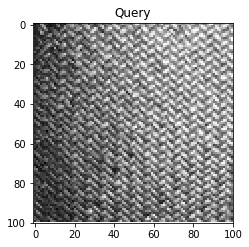

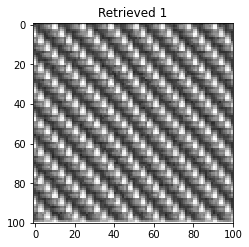

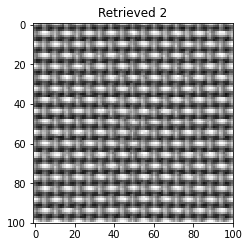

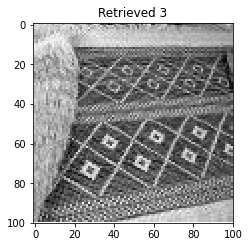

In [ ]:
sort_index = np.argsort(dst)
print("The best marches are", list_of_images[sort_index[1]], 
      list_of_images[sort_index[2]],
      list_of_images[sort_index[3]])
print("with distance values:", dst[sort_index[1]], dst[sort_index[2]], dst[sort_index[3]])
display_image(io.imread(list_of_images[sort_index[0]])/256,title='Query',size=2)
display_image(io.imread(list_of_images[sort_index[1]])/256,title='Retrieved 1',size=2)
display_image(io.imread(list_of_images[sort_index[2]])/256,title='Retrieved 2',size=2)
display_image(io.imread(list_of_images[sort_index[3]])/256,title='Retrieved 3',size=2)

Let's make a few experiments. I am going to perform the same process as before but with a different image:

<ipython-input-49-bf99a2c83248>:14: MatplotlibDeprecationWarning: The resize method was deprecated in Matplotlib 3.6 and will be removed two minor releases later. Use FigureManagerBase.resize instead.
  h.figure.canvas.resize(img.shape[1] + 1, img.shape[0] + 1)


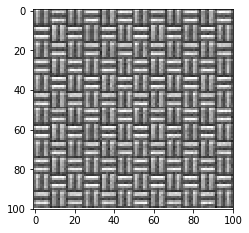

Image:  /content/Data/Woven/woven_0001.jpg ,   Distance:  0.006198426522080405
Image:  /content/Data/Woven/woven_0002.jpg ,   Distance:  0.1953053428776515
Image:  /content/Data/Woven/woven_0003.jpg ,   Distance:  0.1755526903288483
Image:  /content/Data/Woven/woven_0004.jpg ,   Distance:  0.12249325757607947
Image:  /content/Data/Woven/woven_0005.jpg ,   Distance:  0.08558013510330643
Image:  /content/Data/Woven/woven_0007.jpg ,   Distance:  0.25039782608264405
Image:  /content/Data/Woven/woven_0010.jpg ,   Distance:  0.11877434669516461
Image:  /content/Data/Woven/woven_0011.jpg ,   Distance:  0.11562520030643585
Image:  /content/Data/Woven/woven_0012.jpg ,   Distance:  0.11125714976199387
Image:  /content/Data/Woven/woven_0013.jpg ,   Distance:  0.11207005244340522
Image:  /content/Data/Woven/woven_0014.jpg ,   Distance:  0.10669054617692866
Image:  /content/Data/Woven/woven_0015.jpg ,   Distance:  0.10156154102148489
Image:  /content/Data/Woven/woven_0016.jpg ,   Distance:  0.15261

In [ ]:
Texture2 = io.imread('/content/Data/Woven/woven_0001.jpg',as_gray=True)/256
display_image(Texture2,size=2)

n=20
sizes   = np.arange(1,n,1)
val_ori   = Texture.sum()
val_open  = [morphology.opening(Texture2, morphology.disk(n)).sum() for n in sizes]
val_close = [morphology.closing(Texture2, morphology.disk(n)).sum() for n in sizes]
Granulometry     = np.concatenate((np.flip(val_close),[val_ori],val_open))
Pattern_Spectrum = -np.diff(Granulometry)
Pattern_Spectrum_Query = Pattern_Spectrum/Pattern_Spectrum.sum()
n
# List of image to be analyzed
list_of_images = sorted(glob.glob('/content/Data/Woven/woven*.jpg'))
dst = np.zeros(len(list_of_images))

# Compute the granulomtry
n=20
sizes   = np.arange(1,n,1)
i=0
for filename in list_of_images:
  Texture = io.imread(filename,as_gray=True)/256
  val_ori   = Texture.sum()
  val_open  = [morphology.opening(Texture, morphology.disk(n)).sum() for n in sizes]
  val_close = [morphology.closing(Texture, morphology.disk(n)).sum() for n in sizes]
  Granulometry     = np.concatenate((np.flip(val_close),[val_ori],val_open))
  Pattern_Spectrum = -np.diff(Granulometry)
  Pattern_Spectrum = Pattern_Spectrum/Pattern_Spectrum.sum()
  # Compute the euclidean distante between the pattern spectra
  dst[i] = distance.euclidean(Pattern_Spectrum, Pattern_Spectrum_Query)
  print("Image: ", filename, ",   Distance: ", dst[i])
  i=i+1

The best marches are /content/Data/Woven/woven_0111.jpg /content/Data/Woven/woven_0039.jpg /content/Data/Woven/woven_0130.jpg
with distance values: 0.05640658381224106 0.05921952802170111 0.07492434853315612


<ipython-input-49-bf99a2c83248>:14: MatplotlibDeprecationWarning: The resize method was deprecated in Matplotlib 3.6 and will be removed two minor releases later. Use FigureManagerBase.resize instead.
  h.figure.canvas.resize(img.shape[1] + 1, img.shape[0] + 1)


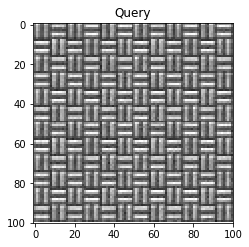

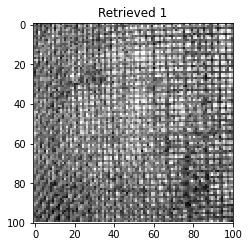

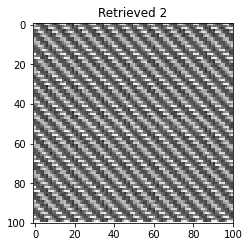

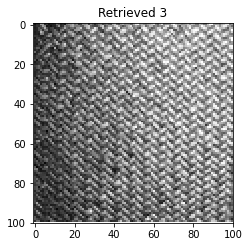

In [ ]:
sort_index = np.argsort(dst)
print("The best marches are", list_of_images[sort_index[1]], 
      list_of_images[sort_index[2]],
      list_of_images[sort_index[3]])
print("with distance values:", dst[sort_index[1]], dst[sort_index[2]], dst[sort_index[3]])
display_image(io.imread(list_of_images[sort_index[0]])/256,title='Query',size=2)
display_image(io.imread(list_of_images[sort_index[1]])/256,title='Retrieved 1',size=2)
display_image(io.imread(list_of_images[sort_index[2]])/256,title='Retrieved 2',size=2)
display_image(io.imread(list_of_images[sort_index[3]])/256,title='Retrieved 3',size=2)

<ipython-input-49-bf99a2c83248>:14: MatplotlibDeprecationWarning: The resize method was deprecated in Matplotlib 3.6 and will be removed two minor releases later. Use FigureManagerBase.resize instead.
  h.figure.canvas.resize(img.shape[1] + 1, img.shape[0] + 1)


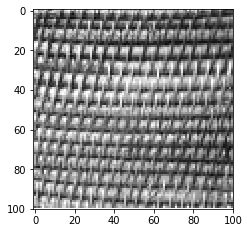

Image:  /content/Data/Woven/woven_0001.jpg ,   Distance:  0.16269450618979414
Image:  /content/Data/Woven/woven_0002.jpg ,   Distance:  0.14488942055649032
Image:  /content/Data/Woven/woven_0003.jpg ,   Distance:  0.139720194816801
Image:  /content/Data/Woven/woven_0004.jpg ,   Distance:  0.1315969577792642
Image:  /content/Data/Woven/woven_0005.jpg ,   Distance:  0.12810279681664202
Image:  /content/Data/Woven/woven_0007.jpg ,   Distance:  0.2414192777408915
Image:  /content/Data/Woven/woven_0010.jpg ,   Distance:  0.11187320115652498
Image:  /content/Data/Woven/woven_0011.jpg ,   Distance:  0.11983172179488912
Image:  /content/Data/Woven/woven_0012.jpg ,   Distance:  0.11669562951175776
Image:  /content/Data/Woven/woven_0013.jpg ,   Distance:  0.12460724790009424
Image:  /content/Data/Woven/woven_0014.jpg ,   Distance:  0.1115894248384513
Image:  /content/Data/Woven/woven_0015.jpg ,   Distance:  0.1120411045065102
Image:  /content/Data/Woven/woven_0016.jpg ,   Distance:  0.1529574121

In [ ]:
Texture3 = io.imread('/content/Data/Woven/woven_0050.jpg',as_gray=True)/256
display_image(Texture3,size=2)

n=20
sizes   = np.arange(1,n,1)
val_ori   = Texture.sum()
val_open  = [morphology.opening(Texture3, morphology.disk(n)).sum() for n in sizes]
val_close = [morphology.closing(Texture3, morphology.disk(n)).sum() for n in sizes]
Granulometry     = np.concatenate((np.flip(val_close),[val_ori],val_open))
Pattern_Spectrum = -np.diff(Granulometry)
Pattern_Spectrum_Query = Pattern_Spectrum/Pattern_Spectrum.sum()
n
# List of image to be analyzed
list_of_images = sorted(glob.glob('/content/Data/Woven/woven*.jpg'))
dst = np.zeros(len(list_of_images))

# Compute the granulomtry
n=20
sizes   = np.arange(1,n,1)
i=0
for filename in list_of_images:
  Texture = io.imread(filename,as_gray=True)/256
  val_ori   = Texture.sum()
  val_open  = [morphology.opening(Texture, morphology.disk(n)).sum() for n in sizes]
  val_close = [morphology.closing(Texture, morphology.disk(n)).sum() for n in sizes]
  Granulometry     = np.concatenate((np.flip(val_close),[val_ori],val_open))
  Pattern_Spectrum = -np.diff(Granulometry)
  Pattern_Spectrum = Pattern_Spectrum/Pattern_Spectrum.sum()
  # Compute the euclidean distante between the pattern spectra
  dst[i] = distance.euclidean(Pattern_Spectrum, Pattern_Spectrum_Query)
  print("Image: ", filename, ",   Distance: ", dst[i])
  i=i+1

The best marches are /content/Data/Woven/woven_0088.jpg /content/Data/Woven/woven_0056.jpg /content/Data/Woven/woven_0025.jpg
with distance values: 0.059361007240102265 0.06100383773894082 0.0620503636463644


<ipython-input-49-bf99a2c83248>:14: MatplotlibDeprecationWarning: The resize method was deprecated in Matplotlib 3.6 and will be removed two minor releases later. Use FigureManagerBase.resize instead.
  h.figure.canvas.resize(img.shape[1] + 1, img.shape[0] + 1)


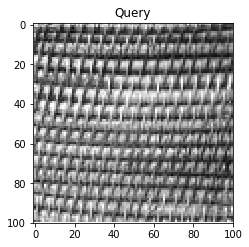

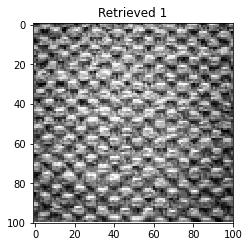

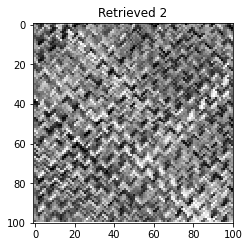

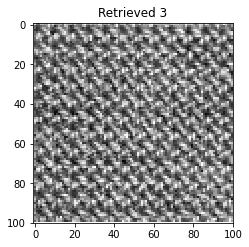

In [ ]:
sort_index = np.argsort(dst)
print("The best marches are", list_of_images[sort_index[1]], 
      list_of_images[sort_index[2]],
      list_of_images[sort_index[3]])
print("with distance values:", dst[sort_index[1]], dst[sort_index[2]], dst[sort_index[3]])
display_image(io.imread(list_of_images[sort_index[0]])/256,title='Query',size=2)
display_image(io.imread(list_of_images[sort_index[1]])/256,title='Retrieved 1',size=2)
display_image(io.imread(list_of_images[sort_index[2]])/256,title='Retrieved 2',size=2)
display_image(io.imread(list_of_images[sort_index[3]])/256,title='Retrieved 3',size=2)

<font color='purple'> Make a few experiments with several query images. Analyse the outcome and comments the results of these experiments:  </font>

---

<font color='red'>Answer:
After doing some experiments (I just represented three of them as it would be too large to write all of them) it seems like the three best matches retrieved by the system are visually similar to the query image, and this similarity is further supported by the relatively low euclidean distance values. The first retrieved image is ususally very similar to the query image. The second and third retrieved images sometimes are pretty different visually, that's because although their pattern spectrum is similar, the objects may be distributed different in the images. The first experiment for example, the third image is very different from the query one. Furthermore, It should be noted that the granulometry approach is not a perfect texture descriptor, and the similarity metric used in this experiment is not always accurate in determining the perceptual similarity of the images. In some cases, two images may have very different granulometry curves but still be visually similar. Additionally, the granulometry approach may not be suitable for some types of textures or images. Nonetheless, the experiment demonstrates the potential of granulometry as a texture descriptor in QBE applications and its ability to retrieve similar images based on the size distribution of patterns in the images.
</font> 

---
Congratulations! You have finished this laboratory! Save the notebook and upload it in Atenea.